### Dataset of Movies

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25, 30)

In [4]:
#Load the data
df = pd.read_excel('tmdb-movies.xlsx')

In [6]:
#shape of the data
df.shape

(10866, 21)

In [7]:
#get the first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


## 1) Does higher budget mean higher popularity

In [69]:
#group the data according to budget(non-repeated values) and display only budget and popularity (subset)
df_avg = df.groupby('budget')[['popularity']].mean().reset_index()
df_avg.shape

(557, 2)

In [70]:
#arranging in descending order according to budget 
df_high = df_avg.sort_values('budget',ascending=0)[['budget','popularity']][0:60]

In [71]:
#indexing
df_high.index = df_high.budget

<AxesSubplot:ylabel='budget'>

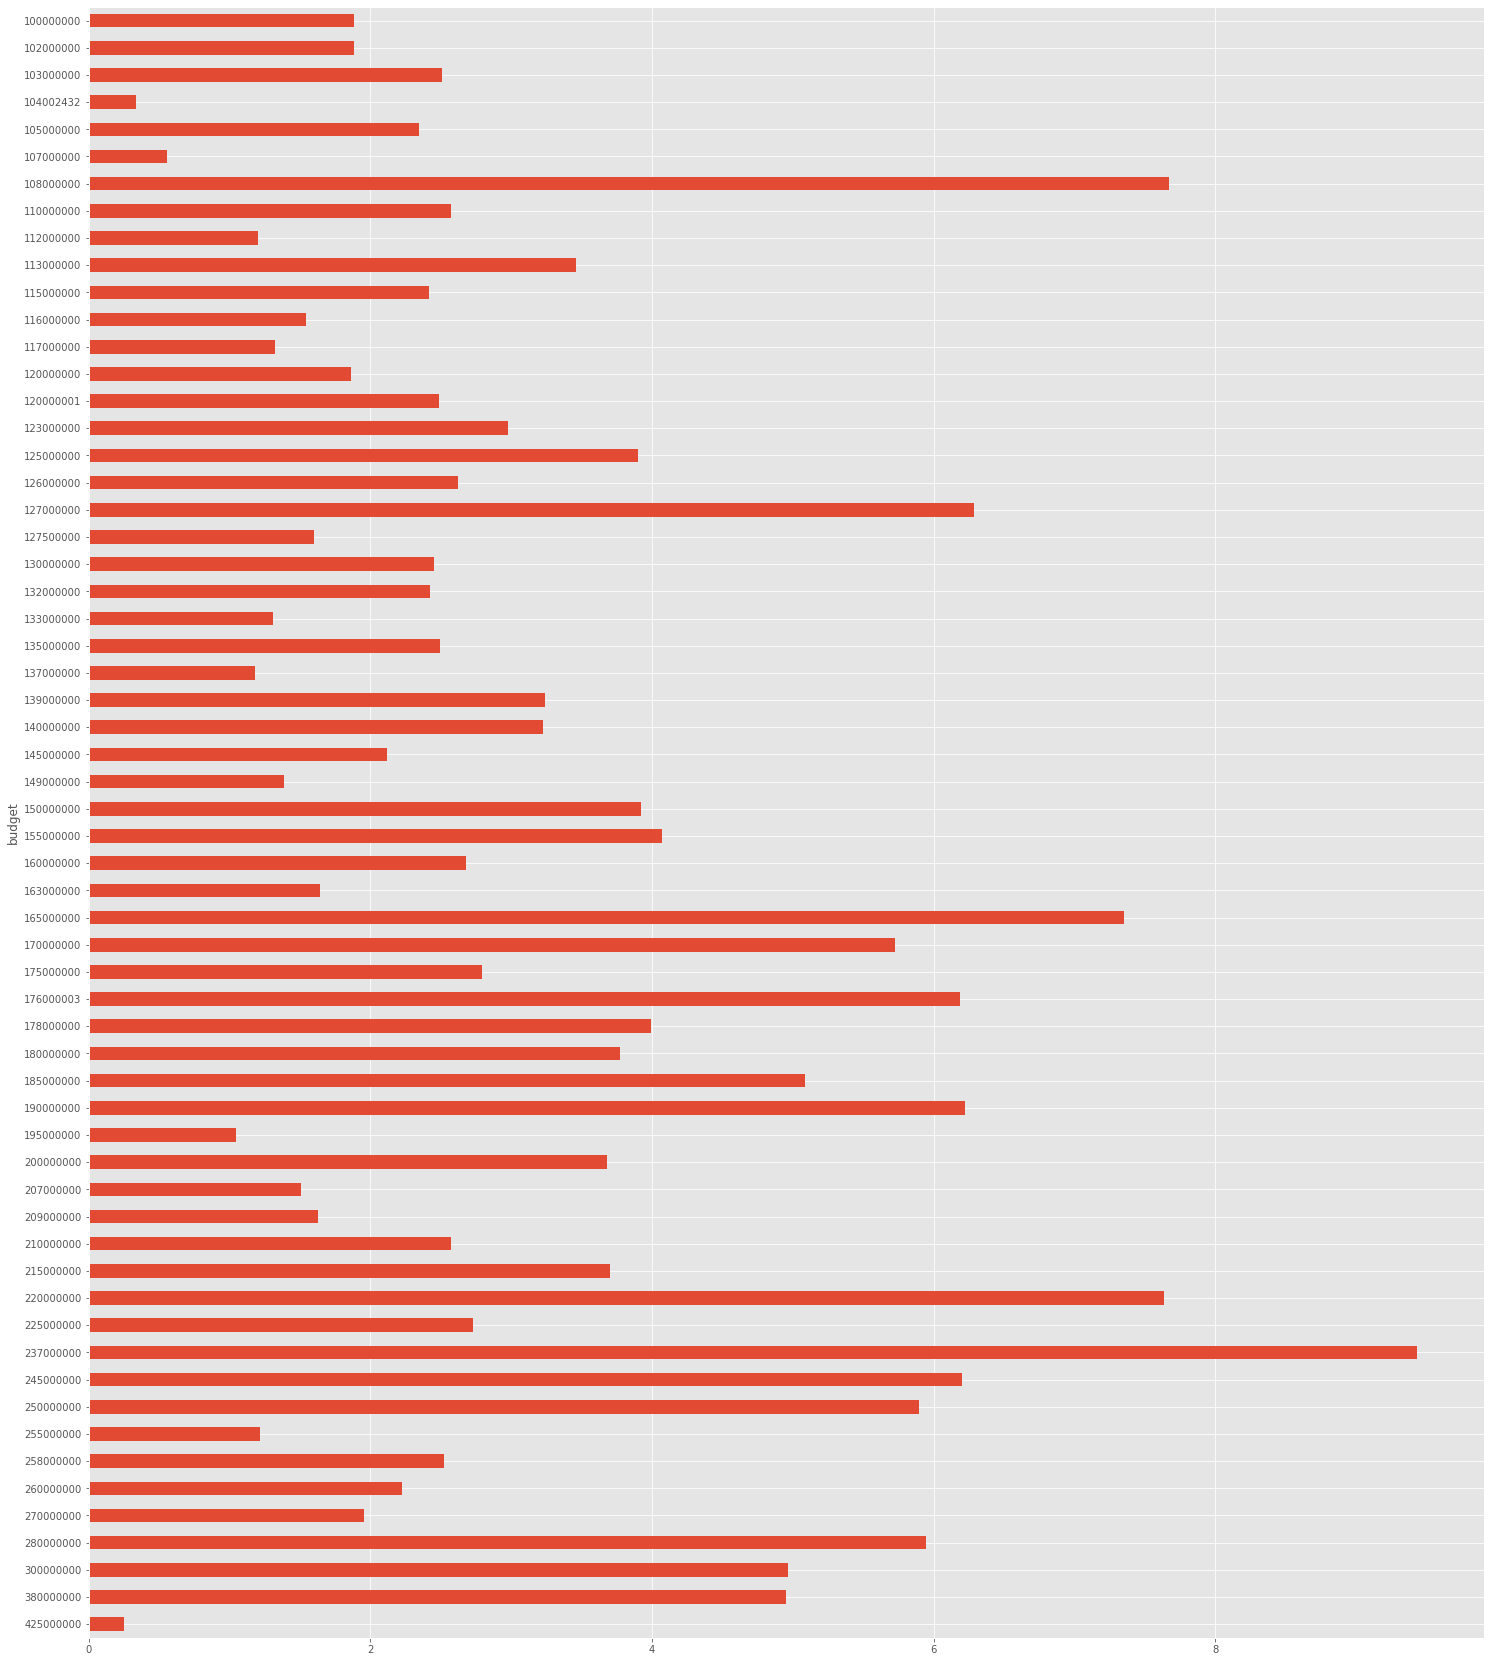

In [84]:
#plot the graph budget vs popularity
df_high.popularity.plot(kind = 'barh')

In [81]:
#descending order of budget
df_low = df_avg.sort_values('budget',ascending=0)[['budget','popularity']][500:]

In [82]:
df_low.index = df_low.budget

<AxesSubplot:ylabel='budget'>

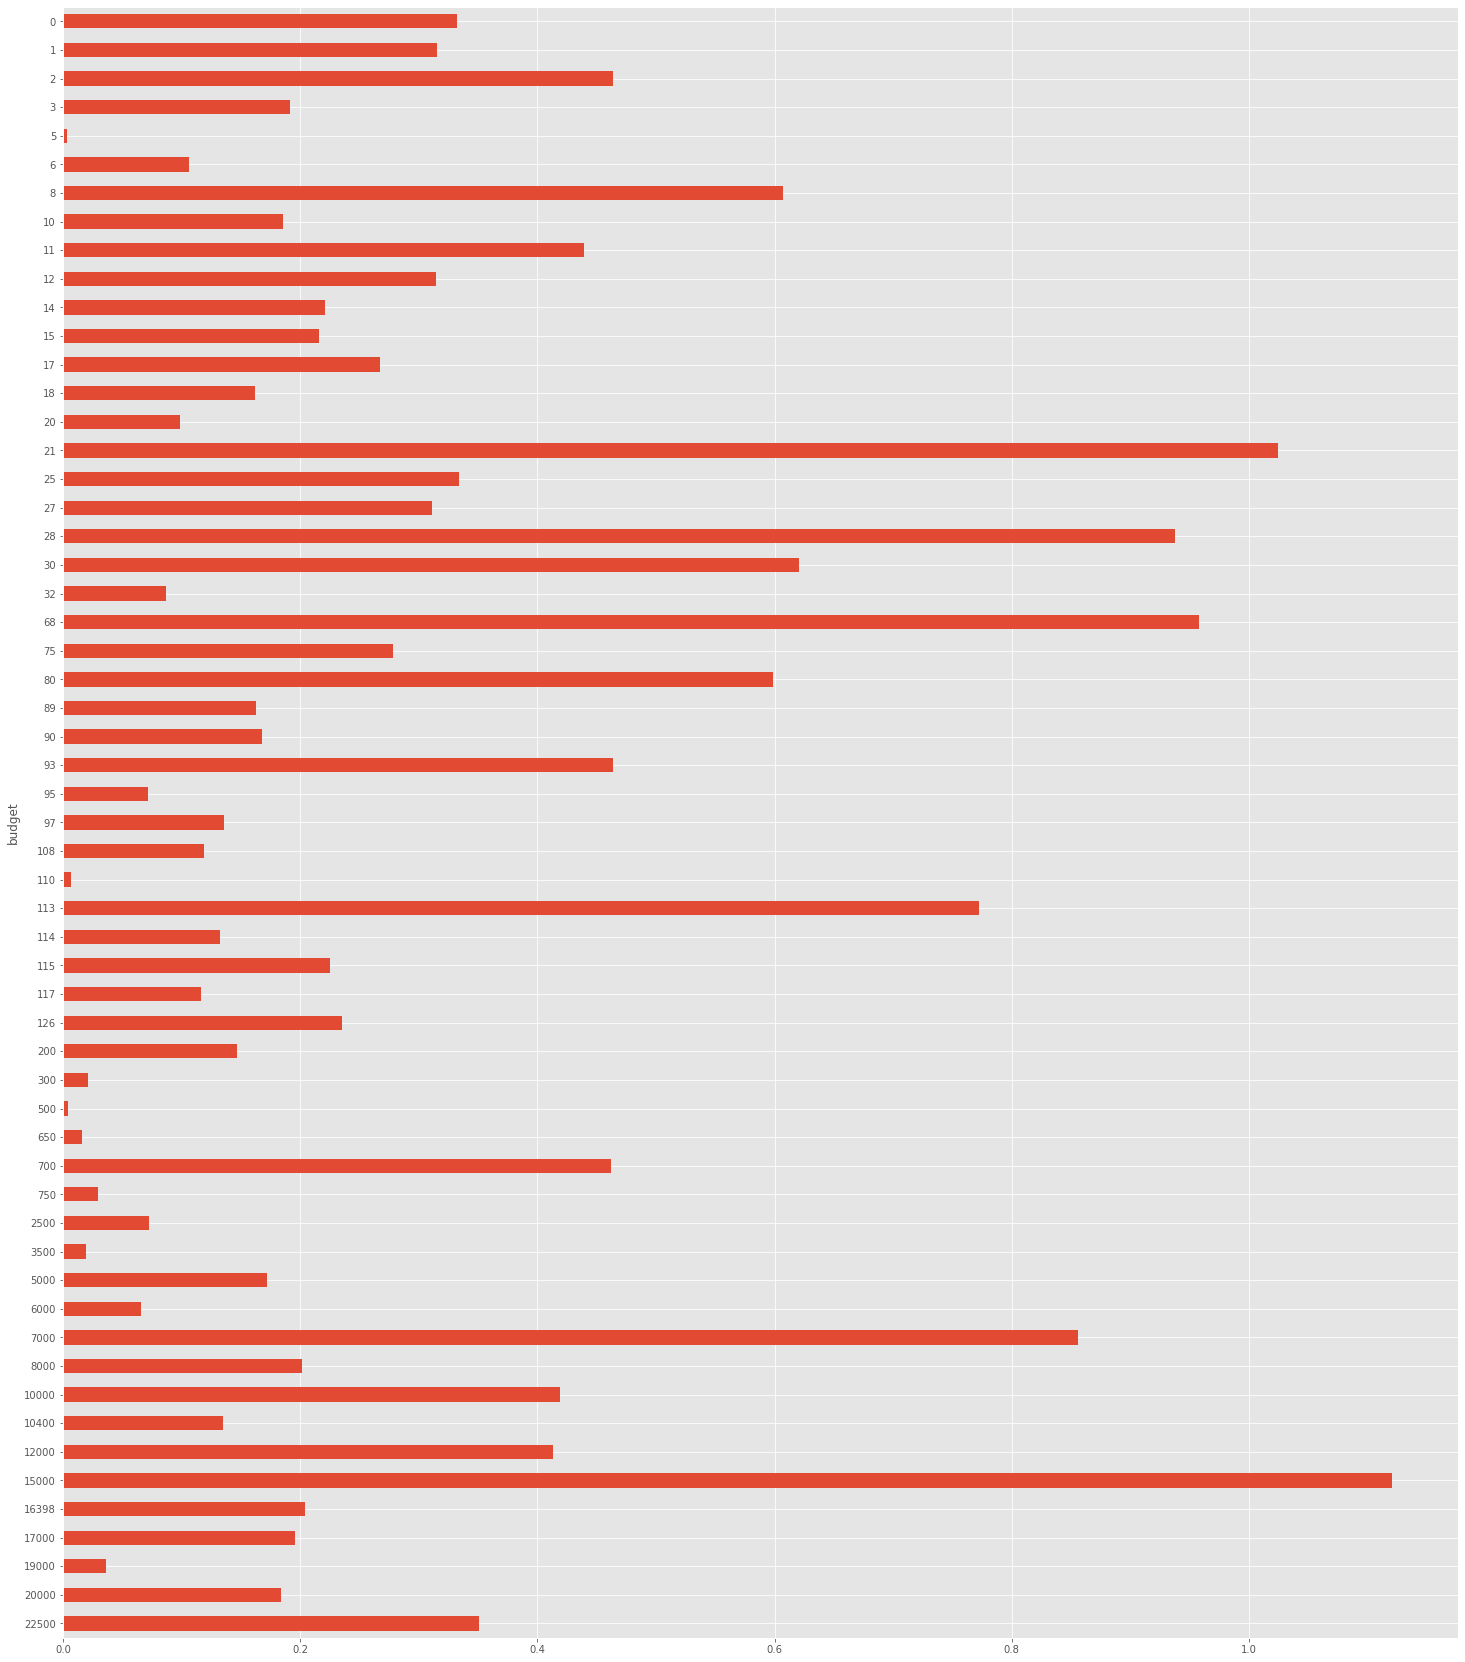

In [83]:
df_low.popularity.plot(kind = 'barh')

The above graphs , first graph is about budget vs popualrity of top 60 budget and second is of bottom 60 budget

 In first one the popularity of almost all budget is above 1+ and second one is below 1 popularity

###### So the conclusion is higher budget means higher popularity but that does not mean highest budget is higher popualrity

## 2.Will there is a co-efficient relationship


In [107]:
#descending order by budget and subset
df_co = df_avg.sort_values('budget',ascending=0)[['budget','popularity']][0:10]
df_co

,budget,popularity
556,425000000,0.250540
555,380000000,4.955130
554,300000000,4.965391
553,280000000,5.944927
552,270000000,1.957331
551,260000000,2.227070
550,258000000,2.520912
549,255000000,1.214510
548,250000000,5.895019
547,245000000,6.200282


In [94]:
df_co.index = df_co.budget

In [99]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (5,5)

<AxesSubplot:ylabel='budget'>

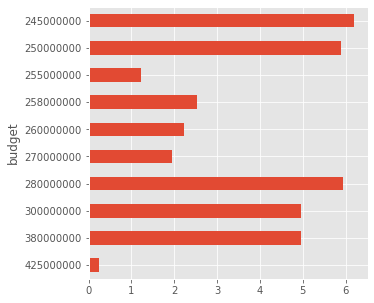

In [100]:
df_co.popularity.plot(kind = 'barh')

In [102]:
df_co1 = df_avg.sort_values('popularity',ascending=0)[['budget','popularity']][0:10]
df_co1

,budget,popularity
546,237000000,9.432768
503,108000000,7.667400
544,220000000,7.637767
530,165000000,7.353744
515,127000000,6.286692
537,190000000,6.224831
547,245000000,6.200282
533,176000003,6.189369
553,280000000,5.944927
548,250000000,5.895019


In [105]:
df_co1.index = df_co1.popularity

<AxesSubplot:ylabel='popularity'>

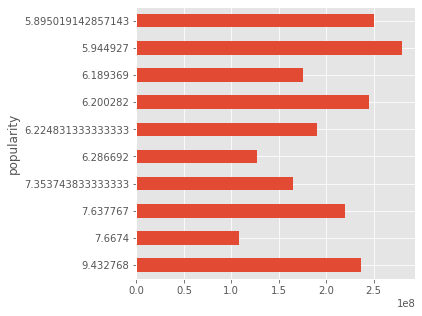

In [106]:
df_co1.budget.plot(kind = 'barh')

Above graphs, the first one is budget vs popularity and the second is popularity vs budget

In first graph , budget increases but the popularity is non uniformly increases or decrease and the same as second graph

##### So the conclusion is there is no co-efficient relationship between budget and popularity

## 3) Will the runtime affect the vote_count and popularity

In [6]:
df_avg = df.groupby('runtime').sum().reset_index()[['vote_count','popularity','runtime']]

In [7]:
df_avg.sort_values('runtime',ascending=0)

,vote_count,popularity,runtime
246,14,0.006925,900
245,38,0.469332,877
244,313,0.537593,705
243,16,0.147489,566
242,17,0.000065,561
...,...,...,...
4,1430,7.470006,5
3,981,7.150373,4
2,451,2.107036,3
1,168,1.118117,2


In [8]:
df_plot1 = df_avg[df_avg['runtime']>200][0:20]

In [9]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:ylabel='runtime'>

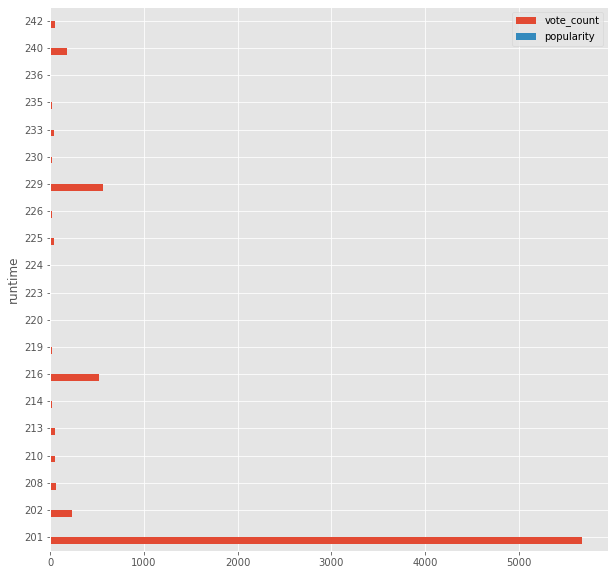

In [10]:
df_plot1.index = df_plot1.runtime
df_plot1[['vote_count','popularity']].plot(kind = 'barh')

#### In this graph , the runtime is from 900 to 200 

<AxesSubplot:ylabel='runtime'>

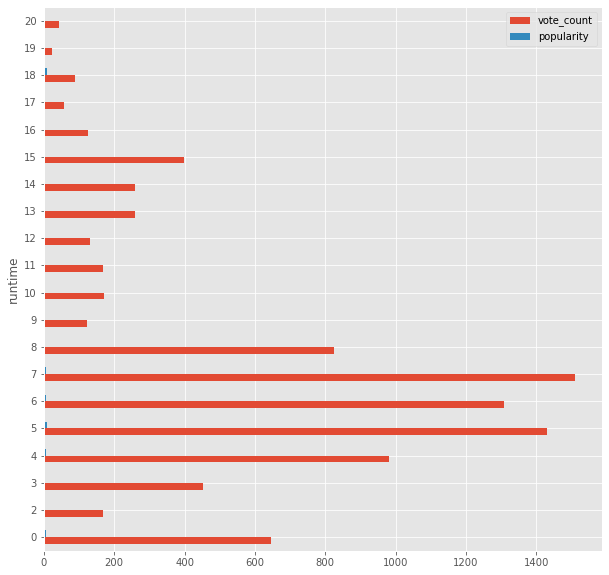

In [12]:
df_plot2 = df_avg[df_avg['runtime']<90][0:20]
df_plot2.index = df_plot2.runtime
df_plot2[['vote_count','popularity']].plot(kind = 'barh')

#### In this graph , the runtime is below 50

In [240]:
df_plot = df_avg[(df_avg['runtime']<170) & (df_avg['runtime']>90)][0:100]
                                 

In [241]:
df_plot.index =df_plot.runtime

In [260]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25, 30)

<AxesSubplot:ylabel='runtime'>

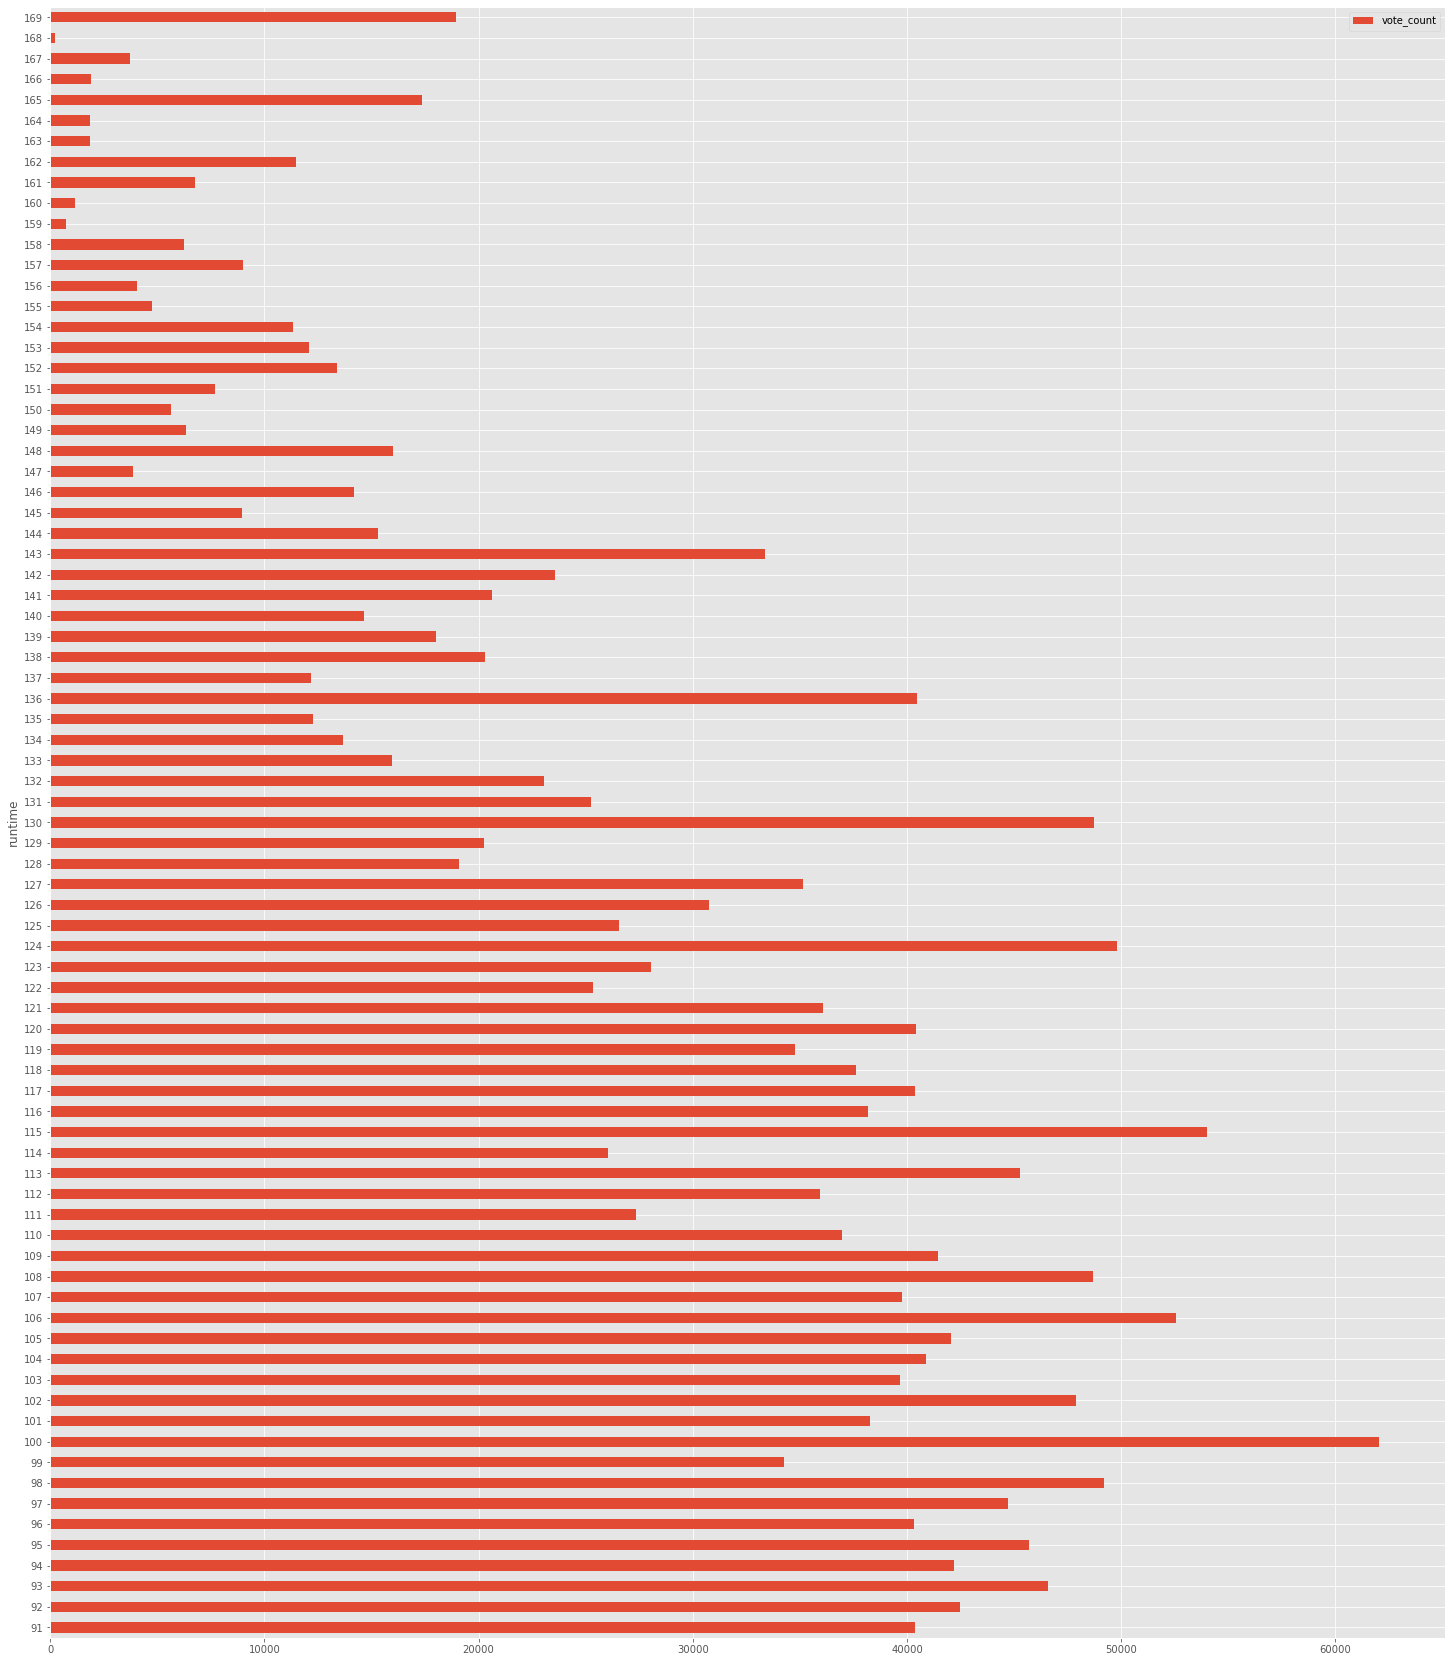

In [261]:
df_plot[['vote_count']].plot(kind ='barh')

<AxesSubplot:ylabel='runtime'>

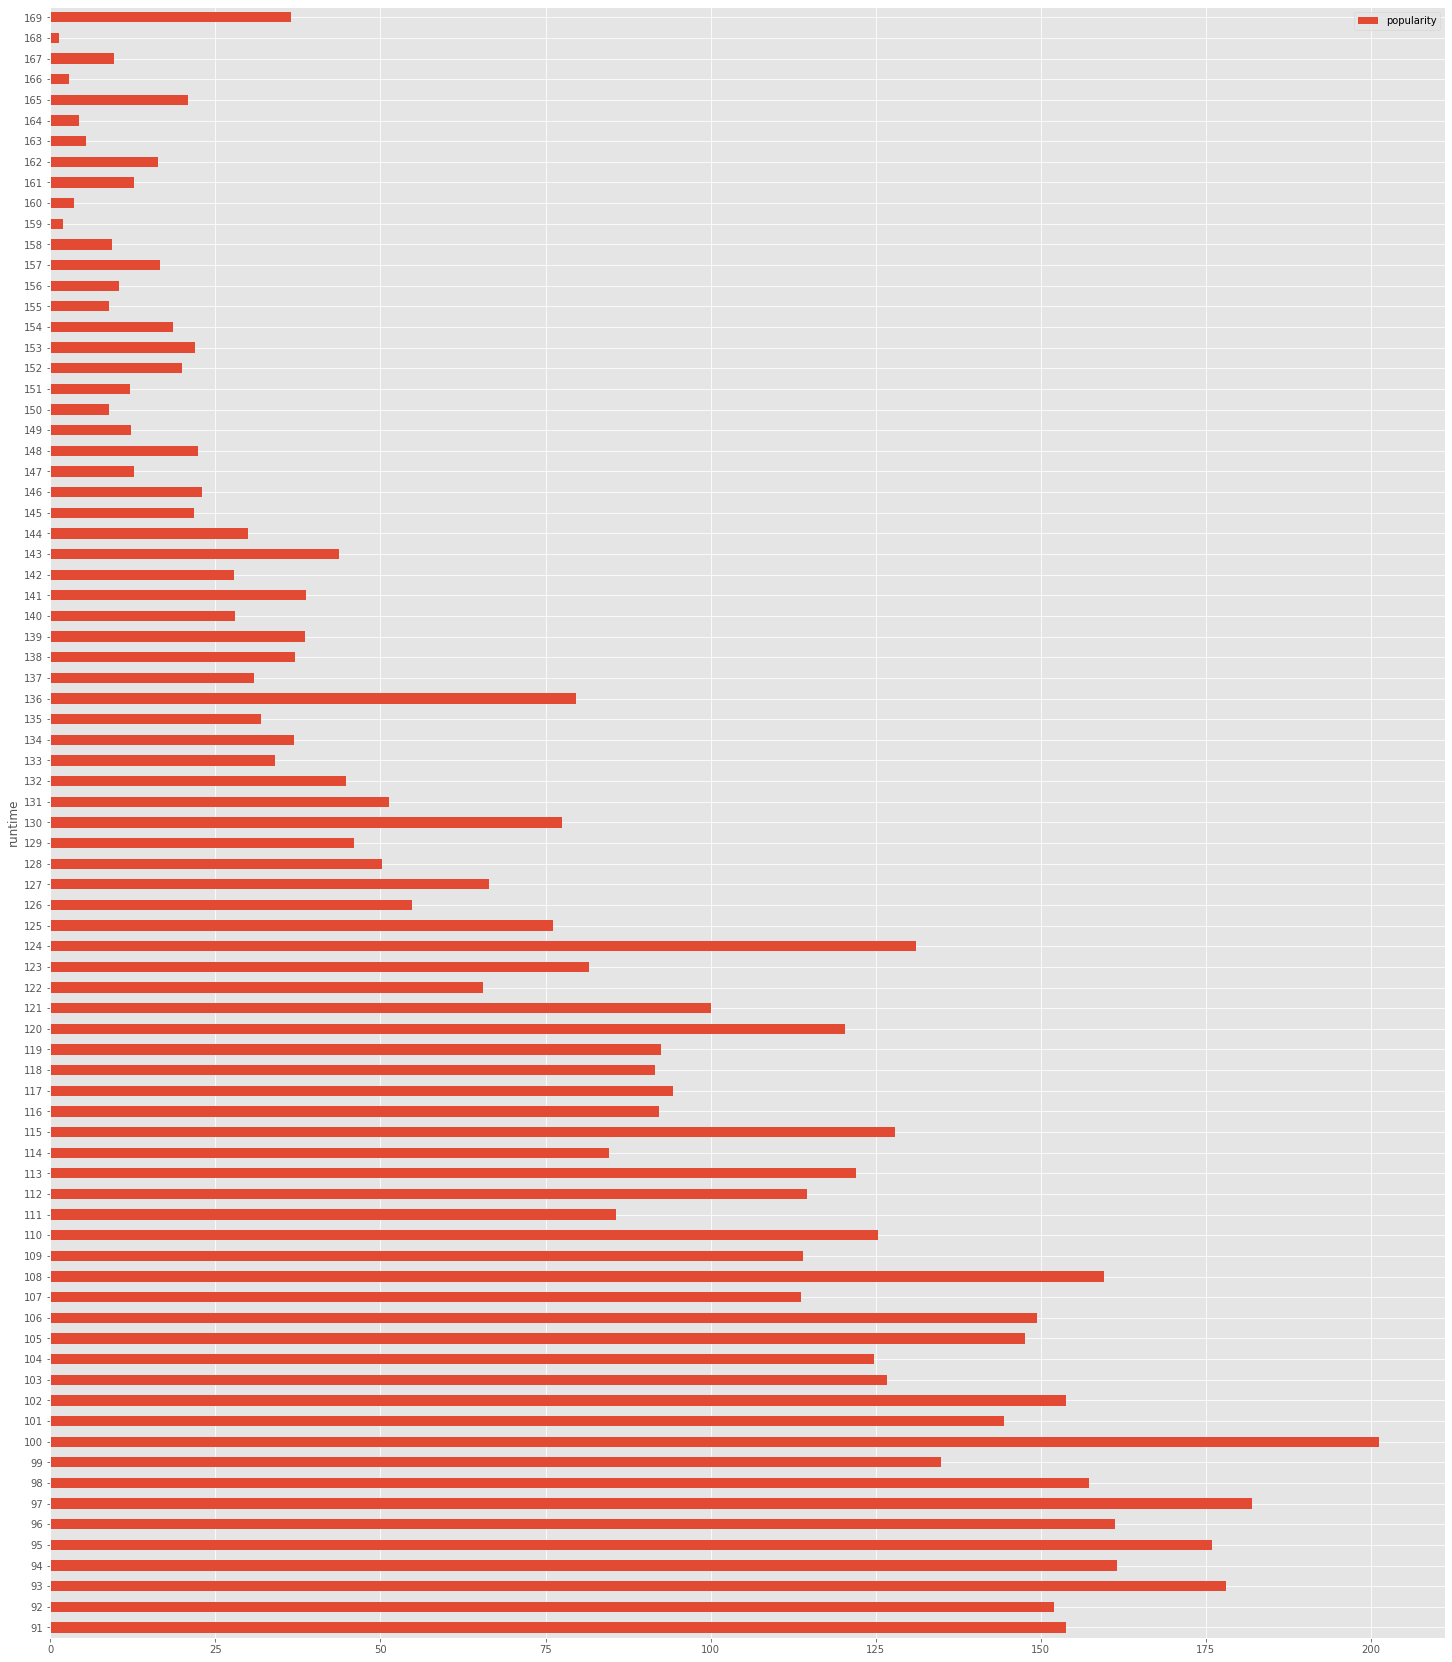

In [262]:
df_plot[['popularity']].plot(kind ='barh')

#### Above two graph is about the runtime between 90 and 170 

#### Comparing to other graph, runtime ranges from 90 to 170 have max vote_count and popularity

#### So the conclusion is that runtime is higher than 200 and lower than 90 affect the vote_count and popularity

## 4) Higher popularity means higher profit ?

In [8]:
df['profit'] = (df['revenue']-df['budget'])

In [9]:
df['profit'][0:10]

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
5     397950503
6     285603537
7     487380321
8    1082730962
9     678708609
Name: profit, dtype: int64

In [18]:
df_pop = df.sort_values('popularity',ascending=0)[['popularity','profit']][0:50]

In [19]:
df_pop.index = df_pop.popularity

<AxesSubplot:ylabel='popularity'>

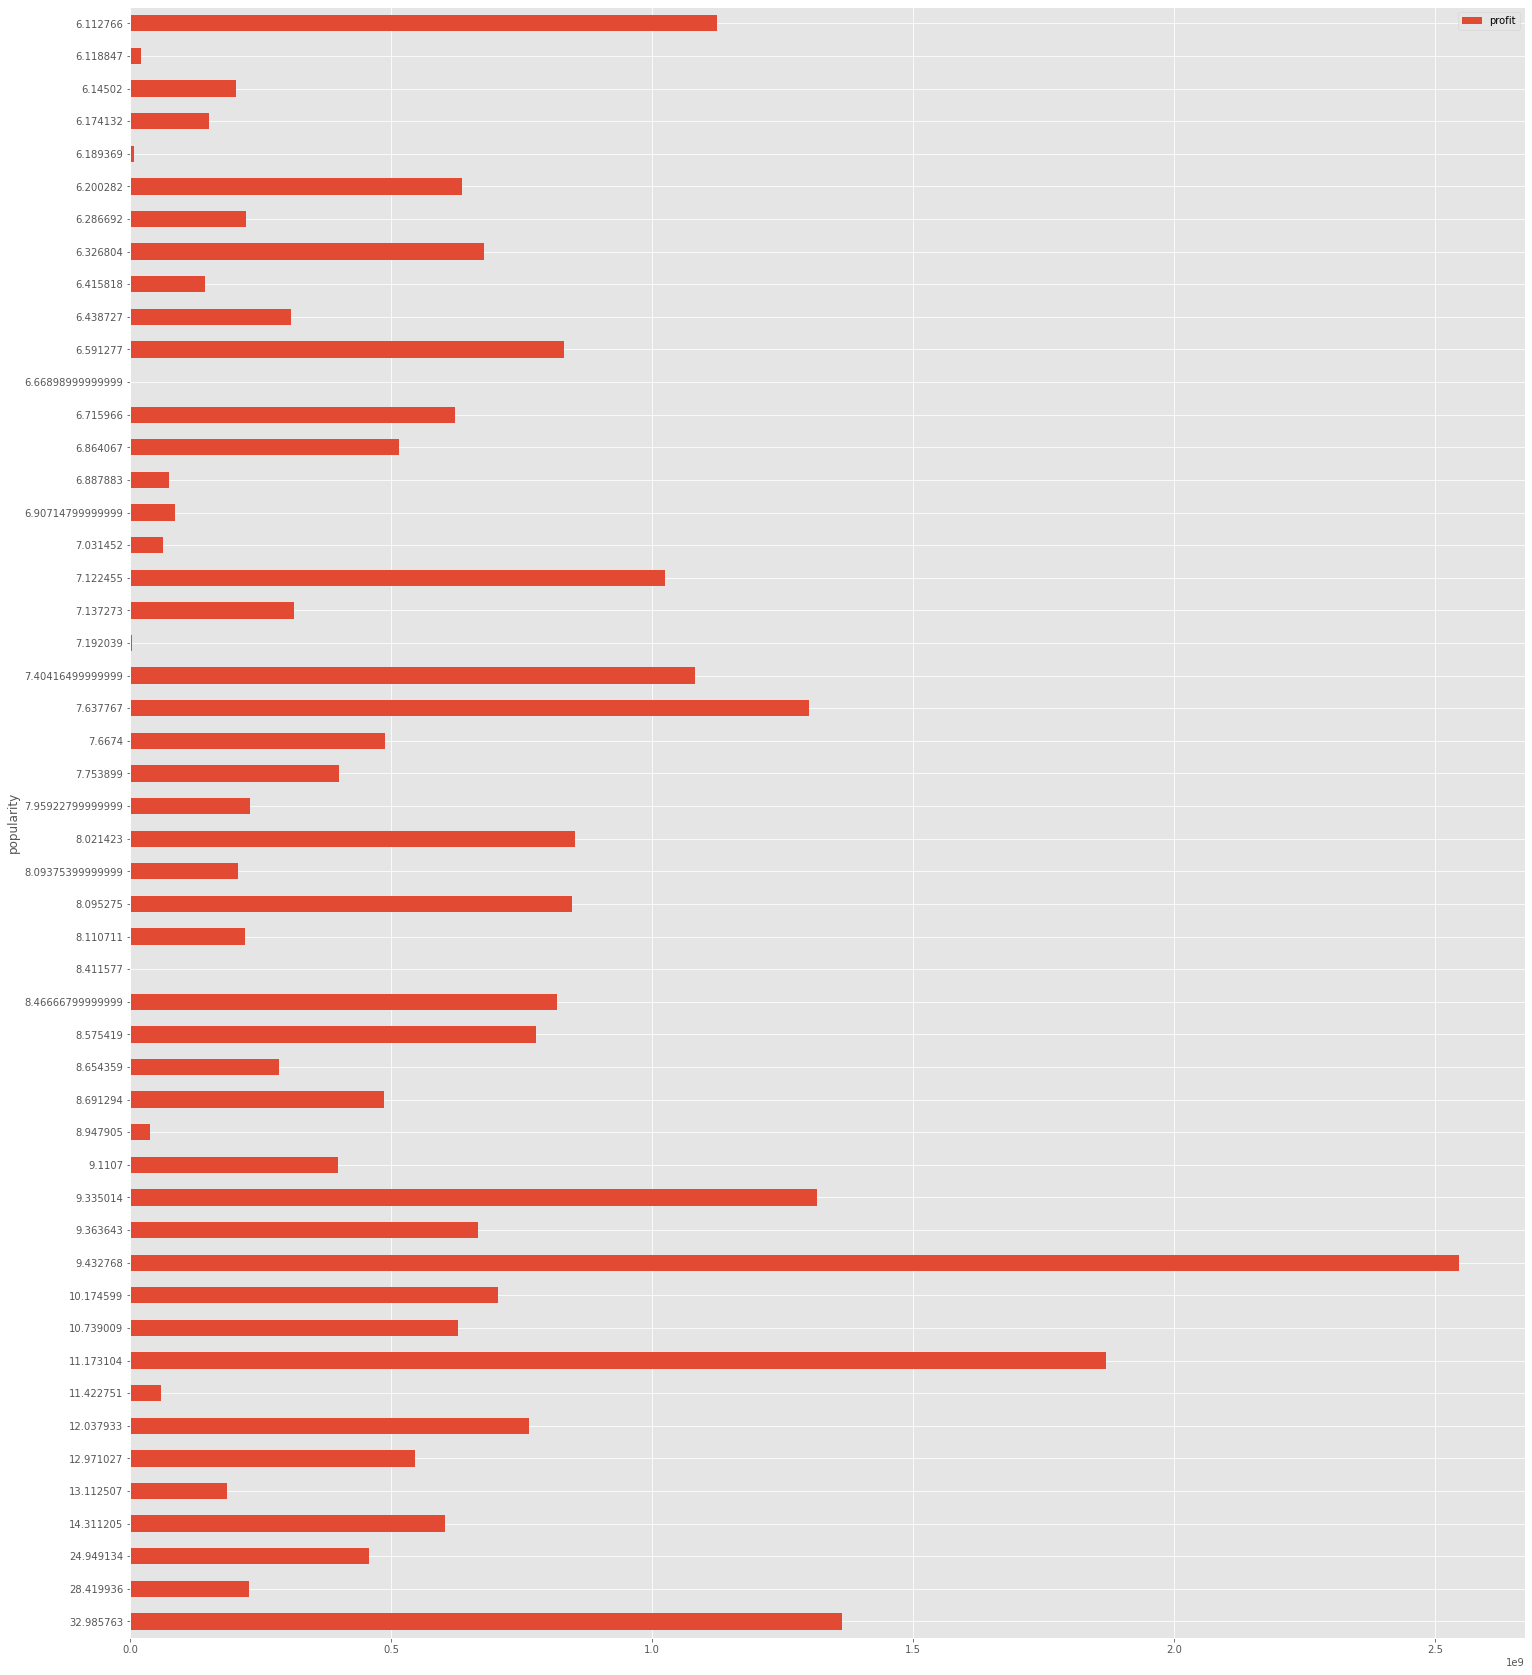

In [20]:
df_pop[['profit']].plot(kind='barh')

In [22]:
df_pop1 = df.sort_values('popularity',ascending=0)[['popularity','profit']][10800:]

In [23]:
df_pop1.index = df_pop1.popularity

<AxesSubplot:ylabel='popularity'>

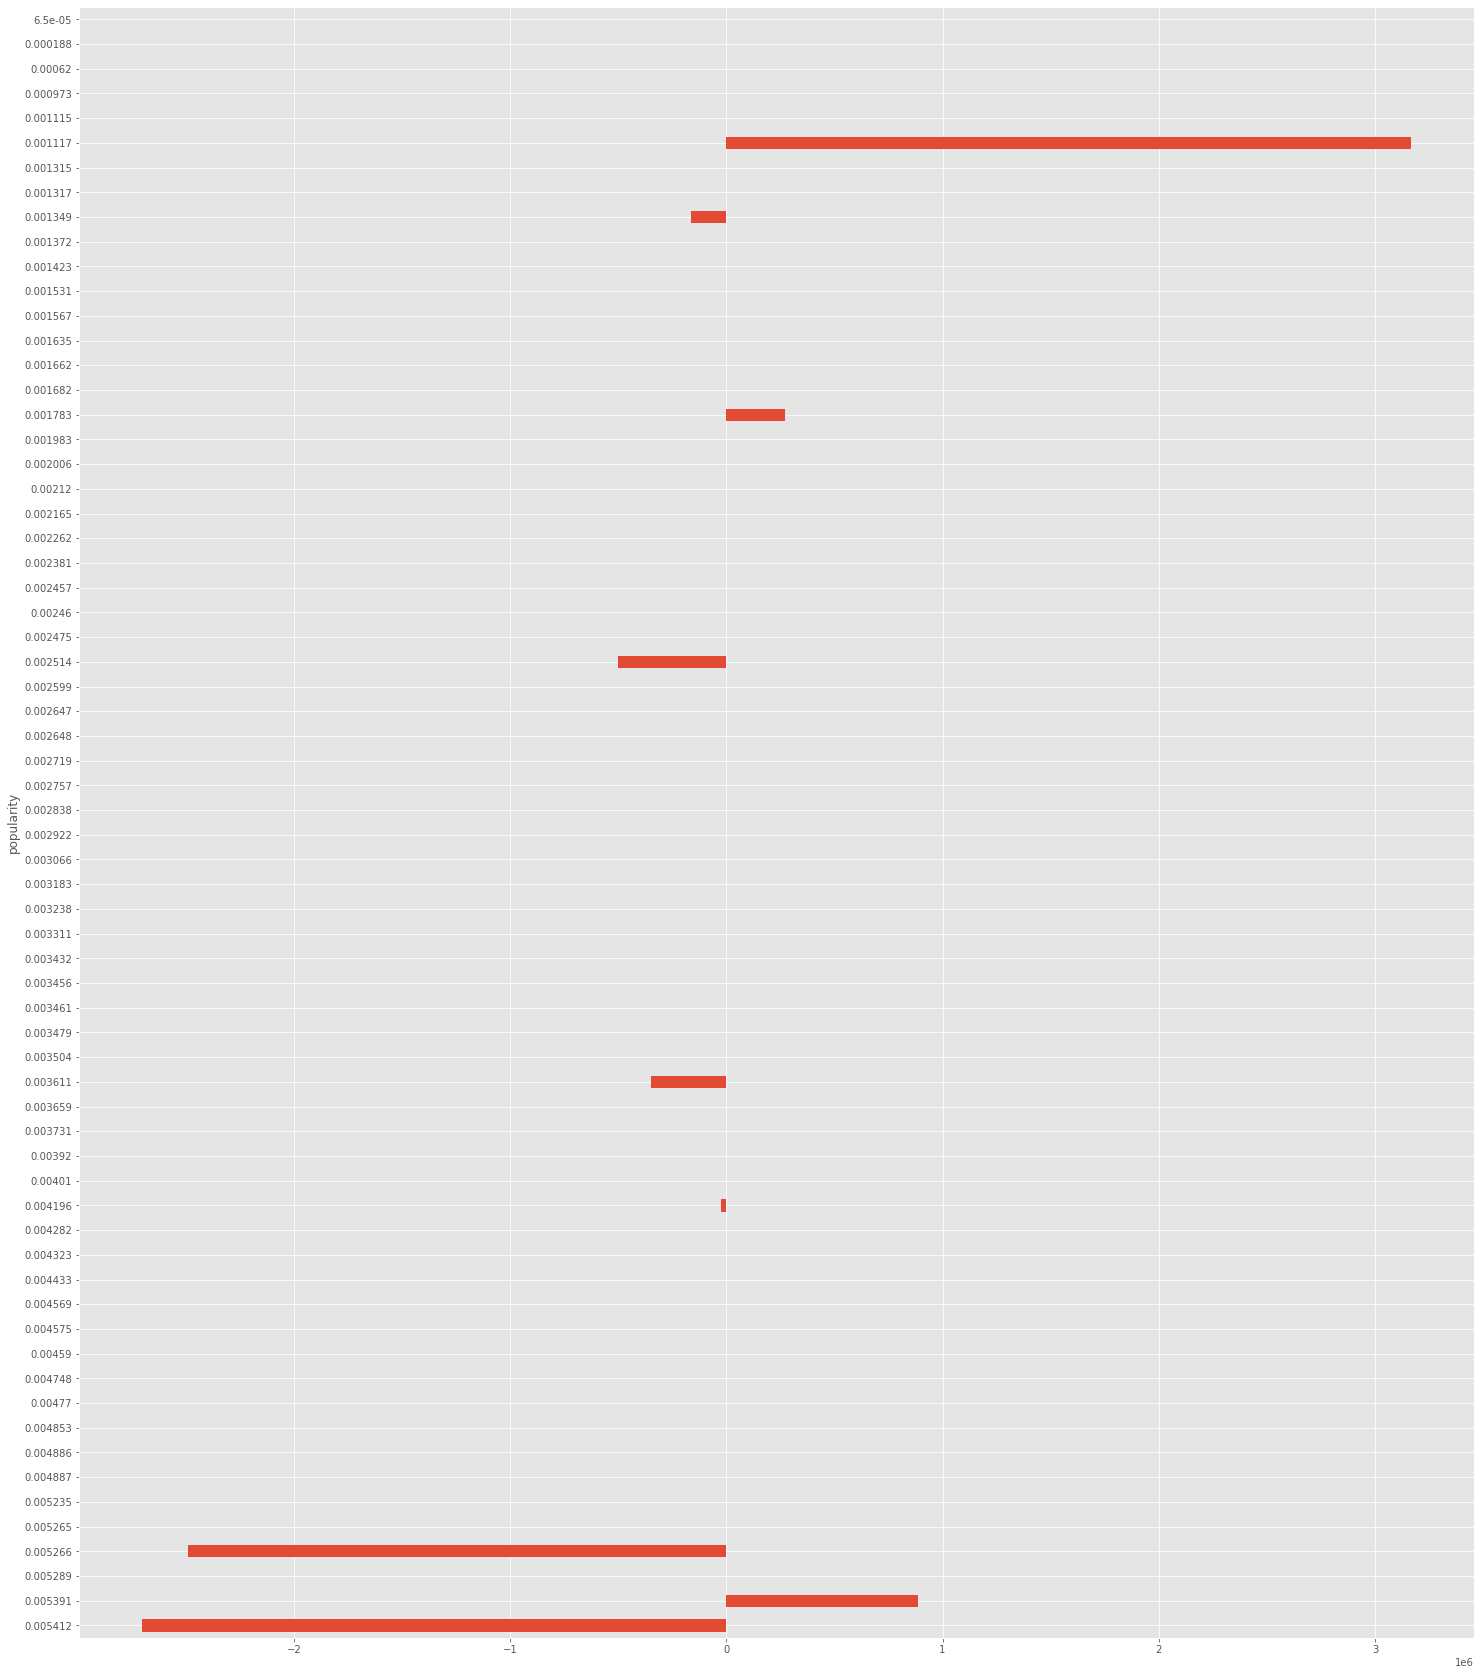

In [24]:
df_pop1['profit'].plot(kind ='barh')

Above graphs, popularity vs profit and first is top 50 popularity and the second one is bottom 60 popularity

It is clear that higher popularity means higher profit but not highest popularity

## 5.What Features are associated with top 10 revenue movies

In [9]:
df_rev = df.sort_values('revenue',ascending=0)
df_rev.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,Unleash the power behind the armor.,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09


In [10]:
df_top = df_rev[['original_title','popularity','vote_count','runtime']][0:10]

In [11]:
df_top.index = df_top.original_title
df_top[0:10]

,original_title,popularity,vote_count,runtime
original_title,,,,
Avatar,Avatar,9.432768,8458,162
Star Wars: The Force Awakens,Star Wars: The Force Awakens,11.173104,5292,136
Titanic,Titanic,4.355219,4654,194
The Avengers,The Avengers,7.637767,8903,143
Jurassic World,Jurassic World,32.985763,5562,124
Furious 7,Furious 7,9.335014,2947,137
Avengers: Age of Ultron,Avengers: Age of Ultron,5.944927,4304,141
Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,5.711315,3750,130
Frozen,Frozen,6.112766,3369,102


In [12]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

<AxesSubplot:xlabel='original_title'>

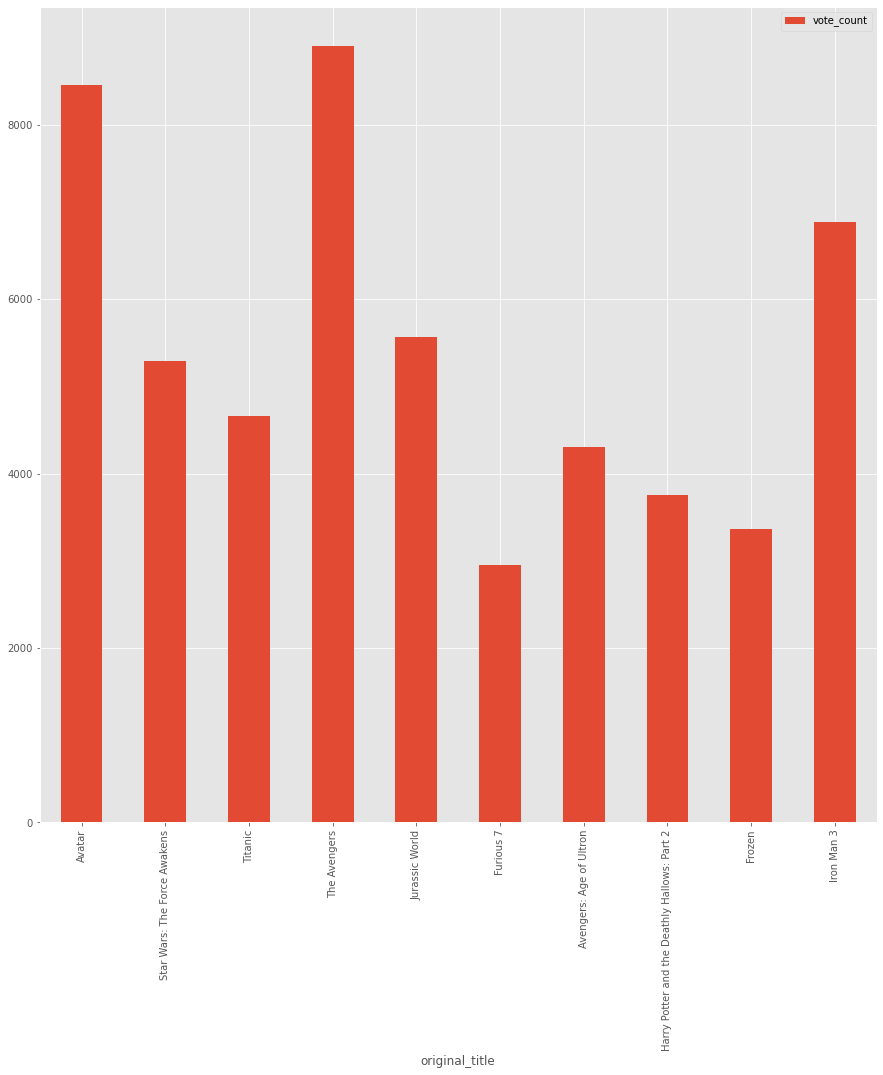

In [13]:
df_top[['vote_count']].plot(kind='bar')

### This graph is about top 10 revenue movies vs vote_count of that movies and it's clear that all ranges from 3000 to 9000 

<AxesSubplot:xlabel='original_title'>

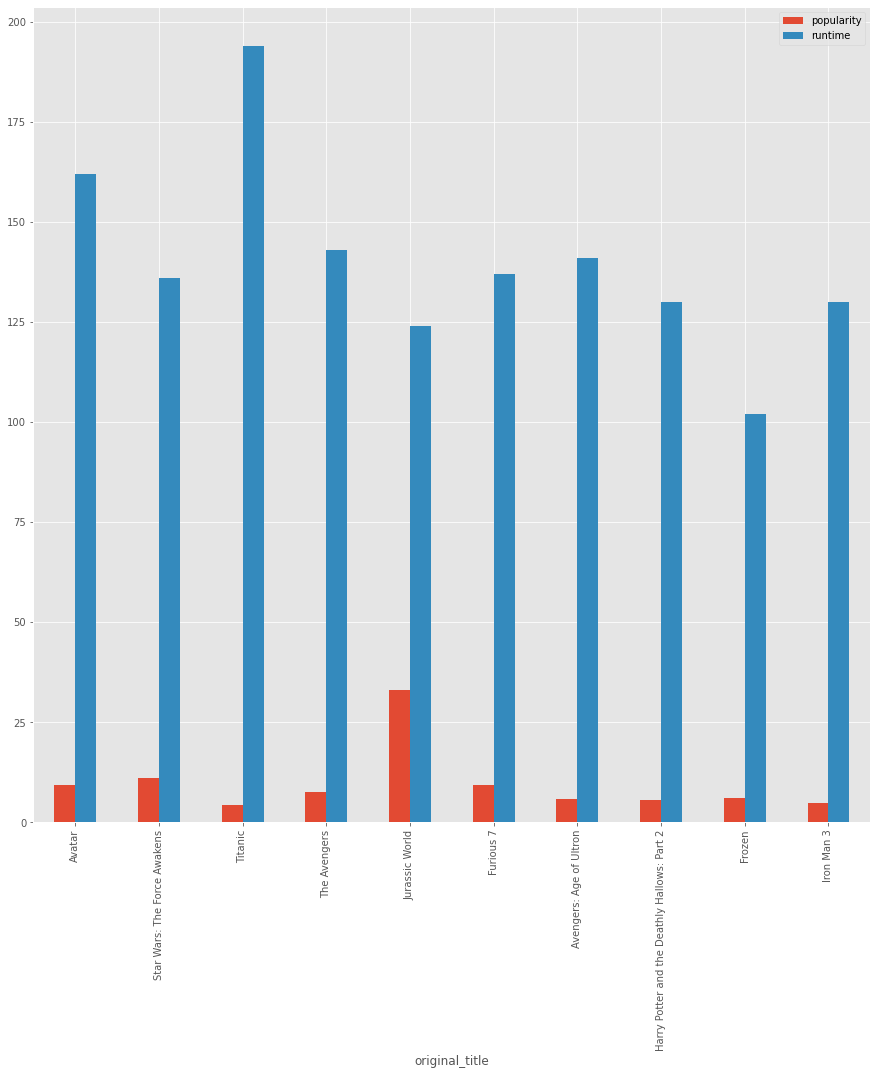

In [14]:
df_top[['popularity','runtime']].plot(kind='bar')

### This is about popularity and runtime of top 10 revenue movies 
### Popularity ranges from 4 to 30 
### Runtime ranges from 102 to 190

#### Here why I take these three only means this all about top 10 revenue so I don't take revenue, profit ,budget because profit is from revenue and budget

## 6.Which genres is popular from year to year

In [169]:
np.array(df['release_year'])

array([2015, 2015, 2015, ..., 1966, 1966, 1966], dtype=int64)

In [170]:
np.array(df['genres'])

array(['Action|Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller', ..., 'Mystery|Comedy',
       'Action|Comedy', 'Horror'], dtype=object)

In [163]:

genre = ['Action','Adventure','Science Fiction','Thriller','Fantasy','Drama','Mystery','Romance','Comedy','Family','Foreign','nan','Documentary','War','Horror','Crime','Animation','Western','History','Music','TV Movie']


In [164]:
genres = list(map(str ,df['genres'] ))
years = np.array(df['release_year'])
popularity = np.array(df['popularity'])


In [185]:
popularity_pd = pd.DataFrame(index = genre, columns = range(1960,2016))
popularity_pd= popularity_pd.fillna(value=0.0)


In [166]:
z = 0
for i in genres:
    split_genre = list(map(str,i.split('|')))
    popularity_pd.loc[split_genre, years[z]] = popularity_pd.loc[split_genre, years[z]] + popularity[z]
    z+=1

In [167]:
popularity_pd

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,4.725796,2.561389,5.671563,3.806916,4.065433,4.062358,3.686859,5.064989,2.193374,5.399760,...,60.259233,72.254120,88.585296,93.794086,100.713037,121.681073,111.986677,122.089178,216.979690,240.901421
Adventure,3.504904,4.603938,6.597594,5.099410,3.682157,3.490923,3.229519,7.178829,5.545733,3.744663,...,51.830019,51.230969,63.528230,81.966362,80.258813,70.028286,73.073879,84.475720,162.845275,226.581261
Science Fiction,0.983714,1.096410,0.358424,0.935671,0.906544,0.203911,1.906741,0.749862,5.374567,0.517620,...,23.845715,25.209269,40.234346,70.260241,37.820094,54.259455,50.663266,75.875393,142.255997,193.121886
Thriller,4.871460,0.000000,5.324075,7.199292,5.603219,3.773787,2.190952,3.509897,2.779596,2.613848,...,75.973838,92.120424,86.206629,102.665018,99.989104,116.041838,108.295298,128.550095,186.504459,239.720907
Fantasy,0.856495,0.308146,0.235542,0.428142,2.399162,0.000000,0.849542,0.561027,2.227921,0.408196,...,34.786562,44.995426,37.681697,50.608117,46.964090,46.534893,46.166250,39.743062,65.856645,57.427532
Drama,7.361967,6.915731,8.232008,4.191829,7.296370,6.105756,5.436264,8.183477,7.546450,6.368528,...,109.448943,109.945124,123.854529,126.897208,123.715224,128.088313,140.376994,166.999176,246.362717,243.848091
Mystery,0.000000,0.712793,1.036881,2.526197,1.232364,0.627611,1.409705,1.204227,6.077823,0.567962,...,23.450649,30.538278,17.796434,31.375811,35.506099,32.673002,16.357765,22.426785,36.493987,51.023584
Romance,3.247365,2.982255,1.828107,3.196581,1.994275,3.113899,2.111415,4.591895,1.562137,1.153067,...,42.824858,39.021882,54.586724,50.982405,53.865920,50.677041,51.936521,39.702135,52.850344,54.085299
Comedy,3.168003,6.798382,1.365917,5.778254,7.859657,2.511049,5.178531,7.391972,2.965935,3.246052,...,97.197895,79.415945,86.858673,111.045444,99.039863,115.304366,104.231064,105.688203,160.332602,152.041317
Family,0.834191,3.778608,0.646926,2.557897,3.513194,1.988139,2.792269,2.886044,2.131317,1.609108,...,50.407490,39.023420,44.220459,49.350055,53.233292,55.893736,31.257886,39.526268,47.765725,60.237690
